In [142]:
import cv2 as cv 
from matplotlib import pyplot as plt
import numpy as np 
import math

plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

(480, 640, 3)

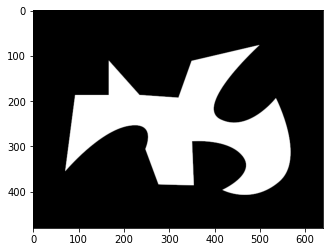

In [143]:
image = cv.imread("img/pattern-01.png")
grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image[:,:, ::-1])
image.shape


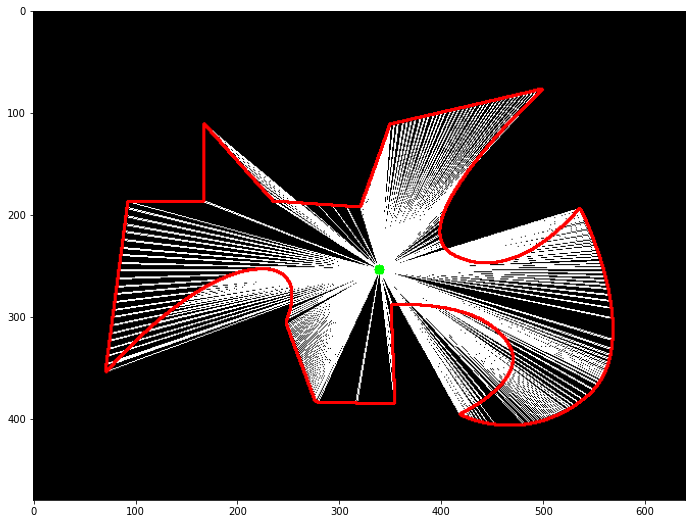

In [144]:
contours, h = cv.findContours(grey, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

m = cv.moments(contours[0])

cx, cy = int(m["m10"] / m["m00"]), int(m["m01"] / m["m00"])

black = np.zeros(image.shape)

for point in contours[0]:
    cv.line(black, (cx, cy), point[0], color=(1, 1, 1), thickness=1)

cv.circle(black, (cx, cy), 5, (0, 1, 0), -1)
cv.drawContours(black, contours, -1, (1, 0, 0), 2)

fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
_ = ax.imshow(black)


In [145]:
def approxContours(cntr, epsilon=0.1):
    peri = cv.arcLength(cntr, True)
    return cv.approxPolyDP(cntr, epsilon * peri, True)

def distance(p1, p2) -> int:
    s1, s2 = np.subtract(p1,p2)
    return math.sqrt(s1**2 + s2**2)

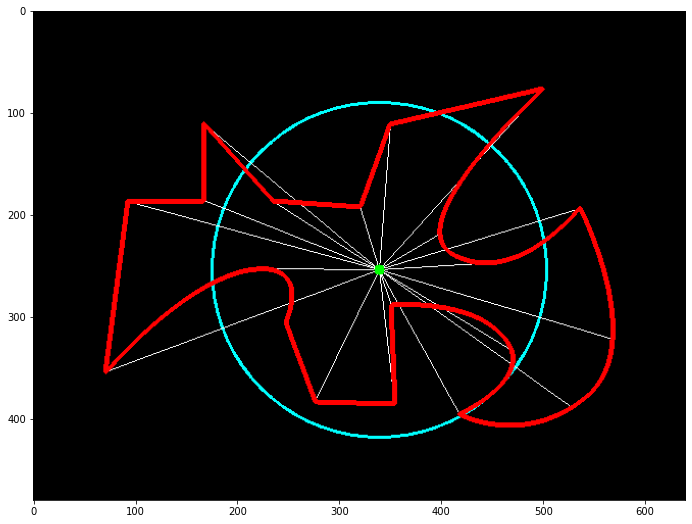

In [146]:
black = np.zeros(image.shape)

apx = approxContours(contours[0], 0.01)

distance_edges = [distance((cx, cy), p[0]) for p in apx]
avg = np.average(distance_edges)

cv.circle(black, (cx, cy), int(avg), color=(0,1,1), thickness=2)

for point in apx:
    r = distance((cx, cy), point[0])
    cv.line(black, (cx, cy), point[0], color=(1,1,1), thickness=1)

cv.circle(black, (cx, cy), 5, (0, 1, 0), -1)
cv.drawContours(black, contours, -1, (1, 0, 0), 4)


fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
_ = ax.imshow(black)
